In [2]:
from sklearn.ensemble import IsolationForest
from scipy import stats
import numpy as np
import pandas as pd

def detect_anomalies_iqr(df, feature):
    """
    Detects anomalies using the IQR method.
    
    Args:
    - df (pandas.DataFrame): The input DataFrame.
    - feature (str): The feature for which anomalies are to be detected.
    
    Returns:
    - list: List of indices of anomalies.
    """
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    anomalies = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return anomalies.index.tolist()

def detect_anomalies_zscore(df, feature, threshold=3):
    """
    Detects anomalies using the Z-score method.
    
    Args:
    - df (pandas.DataFrame): The input DataFrame.
    - feature (str): The feature for which anomalies are to be detected.
    - threshold (float): The Z-score threshold beyond which data points are considered anomalies.
    
    Returns:
    - list: List of indices of anomalies.
    """
    z_scores = np.abs(stats.zscore(df[feature]))
    anomalies = np.where(z_scores > threshold)
    
    return anomalies[0].tolist()

def detect_anomalies_isolation_forest(df, feature):
    """
    Detects anomalies using the Isolation Forest method.
    
    Args:
    - df (pandas.DataFrame): The input DataFrame.
    - feature (str): The feature for which anomalies are to be detected.
    
    Returns:
    - list: List of indices of anomalies.
    """
    model = IsolationForest(contamination=0.05)
    model.fit(df[feature].values.reshape(-1, 1))
    preds = model.predict(df[feature].values.reshape(-1, 1))
    anomalies = np.where(preds == -1)
    
    return anomalies[0].tolist()

# For demonstration purposes, let's create a sample dataframe and detect anomalies
sample_data_for_anomalies = {
    'Feature': [10, 11, 10, 12, 10, 11, 50, 11, 10, 12, 10, 11, 10, 11, 12, 13, 11, 12, 10, 100]
}
sample_df_for_anomalies = pd.DataFrame(sample_data_for_anomalies)

# Detect anomalies using the IQR method
anomalies_iqr = detect_anomalies_iqr(sample_df_for_anomalies, 'Feature')

# Detect anomalies using the Z-score method
anomalies_zscore = detect_anomalies_zscore(sample_df_for_anomalies, 'Feature')

# Detect anomalies using the Isolation Forest method
anomalies_isolation_forest = detect_anomalies_isolation_forest(sample_df_for_anomalies, 'Feature')

anomalies_iqr, anomalies_zscore, anomalies_isolation_forest


([6, 19], [19], [19])

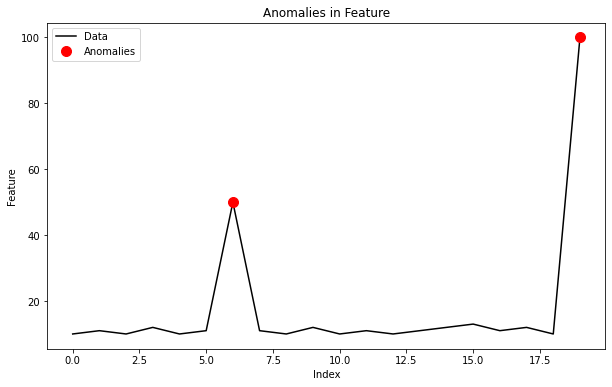

In [4]:
import matplotlib.pyplot as plt
def visualize_anomalies(df, feature, anomalies):
    """
    Visualizes the data and highlights anomalies.
    
    Args:
    - df (pandas.DataFrame): The input DataFrame.
    - feature (str): The feature for which anomalies are to be detected.
    - anomalies (list): List of indices of anomalies.
    
    Returns:
    - plt.figure: A plot visualizing the data and anomalies.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df[feature], 'k-', label='Data')
    plt.plot(anomalies, df.iloc[anomalies][feature], 'ro', label='Anomalies', markersize=10)
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.title(f'Anomalies in {feature}')
    plt.legend()
    return plt

# Visualize anomalies detected by the IQR method
visualize_anomalies(sample_df_for_anomalies, 'Feature', anomalies_iqr).show()


In [2]:
import requests 
import pandas as pd
from io import StringIO

In [5]:
normal_list="https://api.etherscan.io/api?module=account&action=txlist&address="+"0x6a091a3406E0073C3CD6340122143009aDac0EDa"+"&startblock=StartBlockNumber&endblock=EndBlockNumber&sort=asc&apikey="+"KQ8CTV715ADWGM62JA2DVZA1V23A9MBHHU"
y = requests.get(normal_list)
x=pd.read_json(StringIO(y.text))
x.to_csv("data.csv")

In [7]:
x.result.to_csv("data.csv")